In [37]:
import json

In [38]:
import tweepy

In [39]:
consumer_key = '##'
consumer_secret = '##'
access_token = '##'
access_token_secret = '##'

In [40]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [41]:
tweets_list = tweepy.Cursor(api.search, q="#Taliban",
                            since='2021-08-24', 
                            until='2021-08-30',
                            tweet_mode='extended',
                            lang="en").items(2000)

In [42]:
output = []
for tweet in tweets_list:
    username=tweet.user.screen_name
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    source = tweet.source
    line = {'id':tweet.id_str ,'username':username,'text' : tweet.full_text,'favourite_count':favourite_count, 'retweet_count' : retweet_count,
            'source': source,'location':tweet.user.location}
    output.append(line)

In [43]:
with open("Taliban-v3_2000tweets.json", "w") as outfile:
    json.dump(output, outfile,indent=3)

In [44]:
import pandas as pd
df=pd.DataFrame(output)

In [45]:
df

,id,username,text,favourite_count,retweet_count,source,location
0,1432130934292295687,seidel_wolfgang,RT @theragex: 🇦🇫 Afghanistan Resistance\n\nPan...,0,17,Twitter Web App,
1,1432130886711996419,CroxThicc,everone dante is swutchung accounts sperad the...,1,0,Twitter Web App,balls
2,1432130851844751361,unpluggedtweets,As Joe Biden and the nato prepare to leave Afg...,0,0,TweetDeck,"Central Region, Singapore"
3,1432130815257821184,newguy15421963,RT @abhijitmajumder: Interesting #Taliban cart...,0,909,Twitter for iPhone,
4,1432130783330770946,Guardian_Elite,@CIA WTF??? Taliban Buys Hunter Biden Painting...,0,0,Twitter Web App,Southern California
...,...,...,...,...,...,...,...
1995,1432082255933890565,DacostaDelton,RT @IndiaToday: #IndiaTodayExclusive \nWe have...,0,14,Twitter for Android,
1996,1432082255745363968,RexGoesFourth,RT @KyleWOrton: There it is: #US forced Presid...,0,54,Twitter Web App,Parler (LunaticRex)
1997,1432082255455920132,TJThomp13,RT @JohnRLottJr: Secretary of State Antony Bli...,0,9,Twitter for iPhone,Saint Petersburg Fl
1998,1432082219279990788,dree_kelly,RT @Pakafghanurdu: The Taliban and Mahmud Ghaz...,0,1,Twitter Web App,Scotland uk


In [46]:
df["location"].isnull().sum()

0

In [47]:
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text

In [48]:
df["text"]=df["text"].apply(cleanText)

In [49]:
df

,id,username,text,favourite_count,retweet_count,source,location
0,1432130934292295687,seidel_wolfgang,: 🇦🇫 Afghanistan Resistance\n\nPanjshir Defend...,0,17,Twitter Web App,
1,1432130886711996419,CroxThicc,everone dante is swutchung accounts sperad the...,1,0,Twitter Web App,balls
2,1432130851844751361,unpluggedtweets,As Joe Biden and the nato prepare to leave Afg...,0,0,TweetDeck,"Central Region, Singapore"
3,1432130815257821184,newguy15421963,: Interesting Taliban cartoons.,0,909,Twitter for iPhone,
4,1432130783330770946,Guardian_Elite,WTF??? Taliban Buys Hunter Biden Painting For...,0,0,Twitter Web App,Southern California
...,...,...,...,...,...,...,...
1995,1432082255933890565,DacostaDelton,: IndiaTodayExclusive \nWe have no association...,0,14,Twitter for Android,
1996,1432082255745363968,RexGoesFourth,: There it is: US forced President Ghani from ...,0,54,Twitter Web App,Parler (LunaticRex)
1997,1432082255455920132,TJThomp13,: Secretary of State Antony Blinken was vacati...,0,9,Twitter for iPhone,Saint Petersburg Fl
1998,1432082219279990788,dree_kelly,: The Taliban and Mahmud Ghaznavi are being di...,0,1,Twitter Web App,Scotland uk


In [50]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [51]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [2]:
pip install -U textblob

In [52]:
df["Subjectivity"]=df["text"].apply(getSubjectivity)
df["Polarity"]=df["text"].apply(getPolarity)

In [3]:
from textblob import TextBlob

In [25]:
from wordcloud import WordCloud

In [27]:
import matplotlib.pyplot as plt

In [16]:
import re

In [53]:
df

,id,username,text,favourite_count,retweet_count,source,location,Subjectivity,Polarity
0,1432130934292295687,seidel_wolfgang,: 🇦🇫 Afghanistan Resistance\n\nPanjshir Defend...,0,17,Twitter Web App,,0.0000,0.0
1,1432130886711996419,CroxThicc,everone dante is swutchung accounts sperad the...,1,0,Twitter Web App,balls,0.0000,0.0
2,1432130851844751361,unpluggedtweets,As Joe Biden and the nato prepare to leave Afg...,0,0,TweetDeck,"Central Region, Singapore",0.0625,0.0
3,1432130815257821184,newguy15421963,: Interesting Taliban cartoons.,0,909,Twitter for iPhone,,0.5000,0.5
4,1432130783330770946,Guardian_Elite,WTF??? Taliban Buys Hunter Biden Painting For...,0,0,Twitter Web App,Southern California,1.0000,-0.5
...,...,...,...,...,...,...,...,...,...
1995,1432082255933890565,DacostaDelton,: IndiaTodayExclusive \nWe have no association...,0,14,Twitter for Android,,0.0000,0.0
1996,1432082255745363968,RexGoesFourth,: There it is: US forced President Ghani from ...,0,54,Twitter Web App,Parler (LunaticRex),0.2000,-0.3
1997,1432082255455920132,TJThomp13,: Secretary of State Antony Blinken was vacati...,0,9,Twitter for iPhone,Saint Petersburg Fl,0.0000,0.0
1998,1432082219279990788,dree_kelly,: The Taliban and Mahmud Ghaznavi are being di...,0,1,Twitter Web App,Scotland uk,0.0000,0.0


In [54]:
all_words=''.join([twts for twts in df["text"]])

In [55]:
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_words)

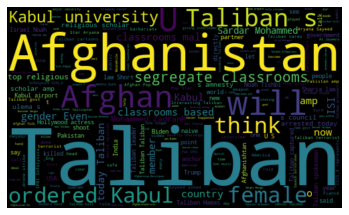

In [56]:
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [57]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return "Positive"

In [58]:
df["Analysis"]=df["Polarity"].apply(getAnalysis)

In [59]:
df

,id,username,text,favourite_count,retweet_count,source,location,Subjectivity,Polarity,Analysis
0,1432130934292295687,seidel_wolfgang,: 🇦🇫 Afghanistan Resistance\n\nPanjshir Defend...,0,17,Twitter Web App,,0.0000,0.0,Neutral
1,1432130886711996419,CroxThicc,everone dante is swutchung accounts sperad the...,1,0,Twitter Web App,balls,0.0000,0.0,Neutral
2,1432130851844751361,unpluggedtweets,As Joe Biden and the nato prepare to leave Afg...,0,0,TweetDeck,"Central Region, Singapore",0.0625,0.0,Neutral
3,1432130815257821184,newguy15421963,: Interesting Taliban cartoons.,0,909,Twitter for iPhone,,0.5000,0.5,Positive
4,1432130783330770946,Guardian_Elite,WTF??? Taliban Buys Hunter Biden Painting For...,0,0,Twitter Web App,Southern California,1.0000,-0.5,Negative
...,...,...,...,...,...,...,...,...,...,...
1995,1432082255933890565,DacostaDelton,: IndiaTodayExclusive \nWe have no association...,0,14,Twitter for Android,,0.0000,0.0,Neutral
1996,1432082255745363968,RexGoesFourth,: There it is: US forced President Ghani from ...,0,54,Twitter Web App,Parler (LunaticRex),0.2000,-0.3,Negative
1997,1432082255455920132,TJThomp13,: Secretary of State Antony Blinken was vacati...,0,9,Twitter for iPhone,Saint Petersburg Fl,0.0000,0.0,Neutral
1998,1432082219279990788,dree_kelly,: The Taliban and Mahmud Ghaznavi are being di...,0,1,Twitter Web App,Scotland uk,0.0000,0.0,Neutral


In [60]:
df["Analysis"].value_counts()

Neutral     789
Positive    784
Negative    427
Name: Analysis, dtype: int64

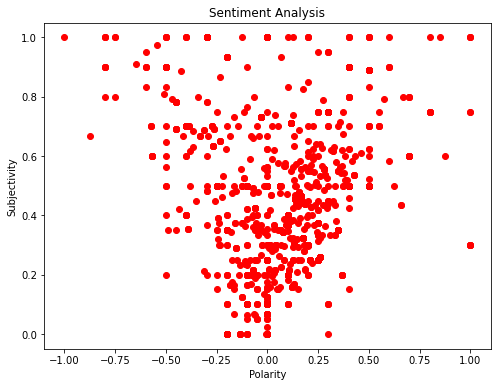

In [61]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df["Polarity"][i],df["Subjectivity"][i],color="Red")
    
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()